In [1]:
print("****************下载文件中。。。")
!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/data/Emotion_Recognition_File.zip
print("****************下载完成。。。")

****************下载文件中。。。
****************下载完成。。。


'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [ ]:
print("****************解压文件中。。。")
!unzip -q -o ./Emotion_Recognition_File.zip -d Emotion_Recognition_File/
print("****************解压完毕***************")

---

In [2]:
import os
import sys
import cv2
import numpy as np


def listfiles(rootDir):
    list_dirs = os.walk(rootDir) 
    for root, dirs, files in list_dirs:  # 遍历文件夹下的图片
        for d in dirs:
            print((os.path.join(root, d)))
        for f in files:
            fileid = f.split('.')[0]  # 获得图片的名字，不含后缀
            filepath = os.path.join(root, f) 
            print(filepath)
            try:
                src = cv2.imread(filepath, 1)  # 读取原始图片，数据会加载到内存中
                print("src=", filepath, src.shape)
                os.remove(filepath) # 移除原来的图片
                cv2.imwrite(os.path.join(root, fileid + ".jpg"), src)  # 保存经过格式转换的图片
            except:
                os.remove(filepath)
                continue

path = "./Emotion_Recognition_File/img_type_test/"  # 输入图片路径即可，可以在这个文件夹下放置各种后缀名的图片，代码会将所有图片统一成 jpg 格式
listfiles(path)

./Emotion_Recognition_File/img_type_test/000012.jpg
src= ./Emotion_Recognition_File/img_type_test/000012.jpg (218, 178, 3)
./Emotion_Recognition_File/img_type_test/000039.jpg
src= ./Emotion_Recognition_File/img_type_test/000039.jpg (218, 178, 3)
./Emotion_Recognition_File/img_type_test/000063.jpg
src= ./Emotion_Recognition_File/img_type_test/000063.jpg (218, 178, 3)
./Emotion_Recognition_File/img_type_test/000104.jpg
src= ./Emotion_Recognition_File/img_type_test/000104.jpg (218, 178, 3)
./Emotion_Recognition_File/img_type_test/000112.jpg
src= ./Emotion_Recognition_File/img_type_test/000112.jpg (218, 178, 3)


检测到人脸的数量 1


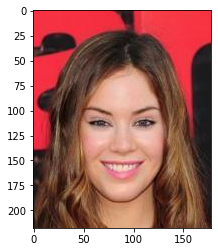

检测到人脸的数量 1


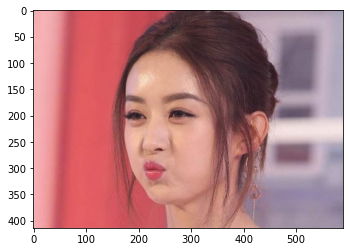

检测到人脸的数量 0


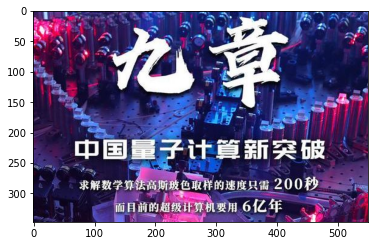

In [4]:
# coding:utf8
import cv2
import dlib
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# 人脸检测的接口，这个是 OpenCV 中自带的
cascade_path = './Emotion_Recognition_File/face_detect_model/haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

img_path = "./Emotion_Recognition_File/face_det_img/" # 测试图片路径
images = os.listdir(img_path)
for image in images:
    im = cv2.imread(os.path.join(img_path, image), 1) # 读取图片
    rects = cascade.detectMultiScale(im, 1.3, 5)  # 人脸检测函数
    print("检测到人脸的数量", len(rects))
    if len(rects) == 0:  # len(rects) 是检测人脸的数量，如果没有检测到人脸的话，会显示出图片，适合本地调试使用，在服务器上可能不会显示
#         cv2.namedWindow('Result', 0)
#         cv2.imshow('Result', im)
#         print("没有检测到人脸")
        pass
    plt.imshow(im[:, :, ::-1])  # 显示
    plt.show()
#         os.remove(os.path.join(img_path, image)) # 
#         k = cv2.waitKey(0)
#         if k == ord('q'): # 在英文状态下，按下按键 q 会关闭显示窗口    
#             break
#     print()
# cv2.destroyAllWindows()   

xmin= 65
xmax= 114
ymin= 150
ymax= 168


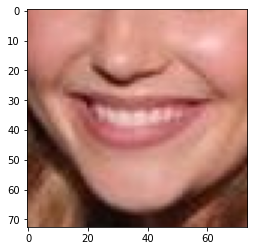

xmin= 67
xmax= 111
ymin= 151
ymax= 169


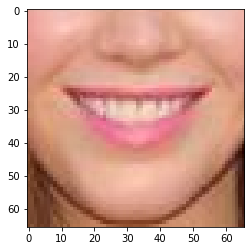

xmin= 73
xmax= 105
ymin= 149
ymax= 161


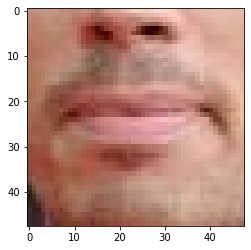

xmin= 513
xmax= 652
ymin= 406
ymax= 515


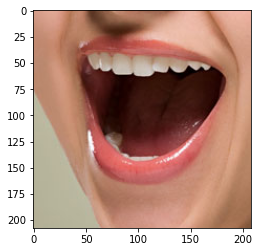

xmin= 211
xmax= 259
ymin= 287
ymax= 322


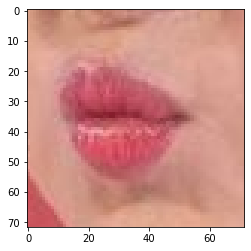

In [5]:
# coding:utf8

import cv2
import dlib
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# 配置 Dlib 关键点检测路径
# 文件可以从 http://dlib.net/files/ 下载
PREDICTOR_PATH = "./Emotion_Recognition_File/face_detect_model/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
# 配置人脸检测器路径
cascade_path = './Emotion_Recognition_File/face_detect_model/haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

# 调用 cascade.detectMultiScale 人脸检测器和 Dlib 的关键点检测算法 predictor 获得关键点结果
def get_landmarks(im):
    rects = cascade.detectMultiScale(im, 1.3, 5) # 人脸检测
    x, y, w, h = rects[0]  # 获取人脸的四个属性值，左上角坐标 x,y 、高宽 w、h
#     print(x, y, w, h)
    rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h)) 
    return np.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])


def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im,
                    str(idx),
                    pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 5, color=(0, 255, 255))
    return im


def getlipfromimage(im, landmarks):
    xmin = 10000
    xmax = 0
    ymin = 10000
    ymax = 0
    # 根据最外围的关键点获取包围嘴唇的最小矩形框
    # 68 个关键点是从
    # 左耳朵0 -下巴-右耳朵16-左眉毛（17-21）-右眉毛（22-26）-左眼睛（36-41）
    # 右眼睛（42-47）-鼻子从上到下（27-30）-鼻孔（31-35）
    # 嘴巴外轮廓（48-59）嘴巴内轮廓（60-67）
    for i in range(48, 67):
        x = landmarks[i, 0]
        y = landmarks[i, 1]
        if x < xmin:
            xmin = x
        if x > xmax:
            xmax = x
        if y < ymin:
            ymin = y
        if y > ymax:
            ymax = y

    print("xmin=", xmin)
    print("xmax=", xmax)
    print("ymin=", ymin)
    print("ymax=", ymax)

    roiwidth = xmax - xmin
    roiheight = ymax - ymin

    roi = im[ymin:ymax, xmin:xmax, 0:3]

    if roiwidth > roiheight:
        dstlen = 1.5 * roiwidth
    else:
        dstlen = 1.5 * roiheight

    diff_xlen = dstlen - roiwidth
    diff_ylen = dstlen - roiheight

    newx = xmin
    newy = ymin

    imagerows, imagecols, channel = im.shape
    if newx >= diff_xlen / 2 and newx + roiwidth + diff_xlen / 2 < imagecols:
        newx = newx - diff_xlen / 2
    elif newx < diff_xlen / 2:
        newx = 0
    else:
        newx = imagecols - dstlen

    if newy >= diff_ylen / 2 and newy + roiheight + diff_ylen / 2 < imagerows:
        newy = newy - diff_ylen / 2
    elif newy < diff_ylen / 2:
        newy = 0
    else:
        newy = imagerows - dstlen

    roi = im[int(newy):int(newy + dstlen), int(newx):int(newx + dstlen), 0:3]
    return roi


def listfiles(rootDir):
    list_dirs = os.walk(rootDir)
    for root, dirs, files in list_dirs:
        for d in dirs:
            print(os.path.join(root, d))
        for f in files:
            fileid = f.split('.')[0]

            filepath = os.path.join(root, f)
            try:
                im = cv2.imread(filepath, 1)
                landmarks = get_landmarks(im)
                roi = getlipfromimage(im, landmarks)
                roipath = filepath.replace('.jpg', '_mouth.png')
#                 cv2.imwrite(roipath, roi)
                plt.imshow(roi[:, :, ::-1])
                plt.show()
            except:
#                 print("error")
                continue


listfiles("./Emotion_Recognition_File/mouth_det_img/")